Consider the 2D Poisson’s equation in the domain Ω = [0, 1] × [0, 1], the unit square:

###$$\frac{\partial^2 u}{\partial x^2} - \frac{\partial^2 u}{\partial y^2} = f \hspace{0.2 cm} in \hspace{0.2 cm} \Omega$$

with the boundary condition
$$ u=g \hspace{0.2 cm} on  \hspace{0.2 cm} \partial{\Omega}$$
where f and g are given functions, and $\partial{\Omega}$ represents the boundary of $\Omega$

The boundary conditions are as follows:

$$g(x,y) = 0 \hspace{3.4 cm} if \hspace{0.2 cm} x=0$$
$$g(x,y) = y \hspace{3.4 cm} if \hspace{0.2 cm} x=1$$
$$g(x,y) = (x-1)sin(x) \hspace{0.6 cm} if \hspace{0.2 cm} y=0$$
$$g(x,y) = x(2-x) \hspace{1.7 cm} if \hspace{0.2 cm} y=0$$

The following stopping criteria is used:

$$\frac{\left\| u^{(k+1)} - u^{(k)}\right\|_2}{\left\| u^{(k+1)}\right\|_2} \leq 10^{-8}$$

In [ ]:
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt
from matplotlib import cm
import math

Run the second code block and enter the stepsize and then run all following code blocks to obtain the plots for Steepest descent and Conjugate gradient

In [ ]:

h =float(input("Enter step size (h) values[0.1,0.05,0.025]: "))
l = 1
m = int(1/h)

dx=h
dy=h

#constructing the A Matrix
#mn x mn is the size of A
A = np.zeros(((m-1)**2,(m-1)**2))
count=0
#the loop goes from m-2 and goes till mn   
for i in range(m-1,(m-1)**2):
        A[i][count] =1
        A[count][i]=1
        count = count+1
D = diags([1, -4, 1], [-1, 0, 1], shape=((m-1)**2, (m-1)**2)).toarray()
A = A+D

for i in range(1,m-1):
    pos = i*(m-1)
    A[pos][pos-1] = 0
    A[pos-1][pos] = 0

#Constructing B Matrix
temp = np.zeros((m+1,m+1))

#Assigning boundary conditions

for i in range(0,m+1):
    temp[i,m] = i*dy

for i in range(0,m):
     temp[0,i] = round(((dx*i)-1)*math.sin(dx*i),3)

for i in range(0,m):
    temp[m,i] = (dx * i)*(2-(dx*i))

B = np.zeros((m-1,m-1))
for i in range(1,m):
    for j in range(1,m):
        B[i-1, j-1] = 4*temp[i, j] - (temp[i+1][j] + temp[i-1][j] + temp[i][j+1] + temp[i][j-1]) 
B = B.reshape(((m -1)**2, 1))

Enter step size (h) values[0.1,0.05,0.025]: 0.1


Steepest Descent

In [ ]:
def Steepest_Descent(A, b):
    x=np.zeros(((m-1)**2,1))
    r = b - np.dot(A,x)
    iters = 0
    error = []
    while True:
        p = r
        u_k = np.copy(x)
        q = np.dot(A,p)
        alpha =   (np.dot(np.transpose(p),r))/(np.dot(np.transpose(p),q))
        x = x + alpha * p
        r = r - alpha * q
        u_k1 = np.copy(x)
        err = np.linalg.norm(u_k1 - u_k) / np.linalg.norm(u_k1)
        error.append(err)
        iters += 1
        if(err < 1e-8):
          break
    X_temp = u_k1.reshape((m-1,m-1))
    X = temp
    for i in range(1, m):
      for j in range(1, m):
        X[i][j] = X_temp[i-1][j-1]
    return X, error, iters

Conjugate Gradient

In [ ]:

def Conjugate_Gradient(A,B):
  x = np.zeros(((m-1)**2, 1))
  r = B - np.dot(A,x)      
  d = r
  deltaold = np.dot(np.transpose(r),r)        
  error = []
  iters = 0
  while True:
    
    u_k = np.copy(x)
    alpha = deltaold / np.dot(np.transpose(d),np.dot(A,d))
    x = x + alpha * d
    u_k1 = np.copy(x)
    r = r - alpha * (np.dot(A,d))
    deltanew = np.dot(r.transpose(),r)
    beta = deltanew/deltaold
    d = r + beta * d
    deltaold = deltanew

    err = np.linalg.norm(u_k1-u_k) / np.linalg.norm(u_k1)
    error.append(err)
    iters = iters+1
    if err < 10**-8:
      break
  X_temp = u_k1.reshape((m-1, m-1))
  X = temp
  for i in range(1, m):
    for j in range(1, m):
      X[i][j] = X_temp[i-1][j-1]
  return X, error, iters


Number of iterations:  304


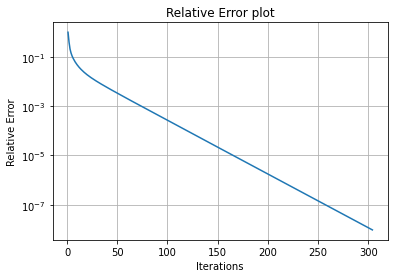

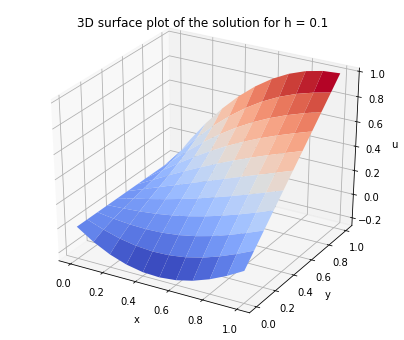

In [ ]:
X_val,error,iters = Steepest_Descent(A,B)
print("Number of iterations: ",iters)
x_axis = np.arange(1,iters+1)
plt.title('Relative Error plot')
plt.xlabel('Iterations')
plt.ylabel('Relative Error')
plt.grid()
plt.semilogy(x_axis,error)


p = np.arange(0,1+h,h)
q = np.arange(0,1+h,h)
X, Y = np.meshgrid(p,q)

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(projection='3d');

ax.plot_surface(X, Y, X_val,cmap=cm.coolwarm);
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('u')
plt.title(r'3D surface plot of the solution for h = {}'.format(h));
plt.show();


Number of iterations:  29


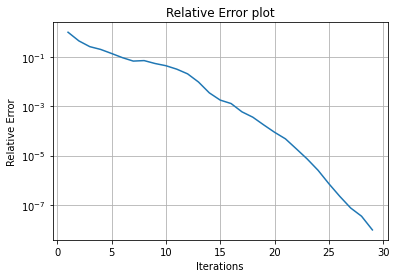

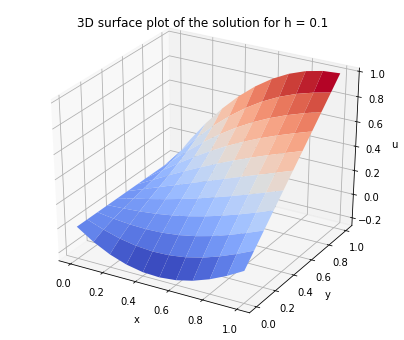

In [ ]:
#Implementing conjugate gradient
X_val,error,iters = Conjugate_Gradient(A,B)
print("Number of iterations: ",iters)
x_axis = np.arange(1,iters+1)
plt.title('Relative Error plot')
plt.xlabel('Iterations')
plt.ylabel('Relative Error')
plt.grid()
plt.semilogy(x_axis,error)

p = np.arange(0,1+h,h)
q = np.arange(0,1+h,h)
X, Y = np.meshgrid(p,q)

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(projection='3d');

ax.plot_surface(X, Y, X_val,cmap=cm.coolwarm);
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('u')
plt.title(r'3D surface plot of the solution for h = {}'.format(h));
plt.show();